In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**1. Load the dataset into python environment**


In [2]:
titanic_data = pd.read_csv('/content/titanic_dataset.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**2. Make ‘PassengerId’ as the index column**


In [4]:
titanic_data.set_index('PassengerId', inplace=True)

In [5]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**4. Fill in all the missing values present in all the columns in the dataset**

In [7]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [9]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
titanic_data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [11]:
titanic_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
titanic_data['Cabin']=titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0])

In [13]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [14]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**


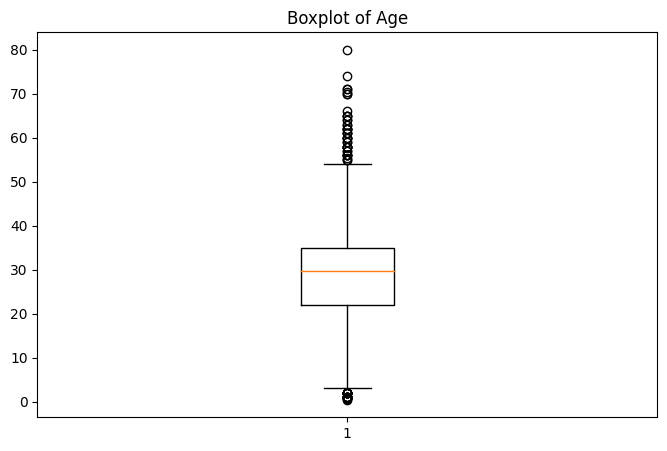

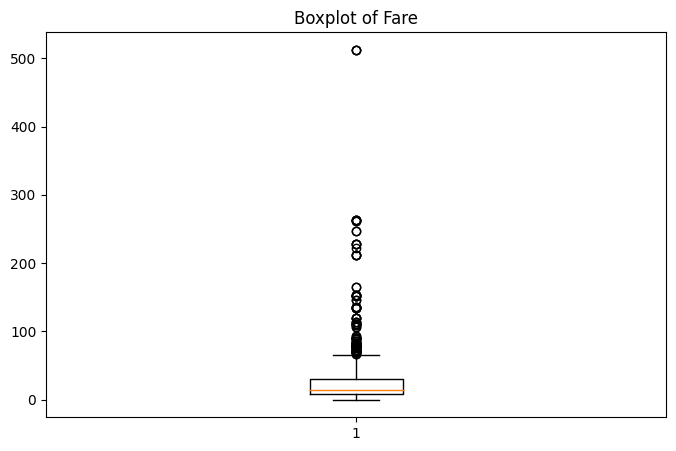

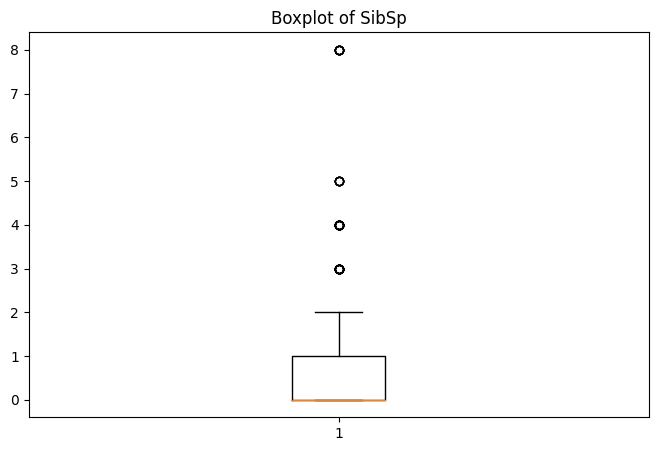

In [15]:
columns_with_outliers = ['Age', 'Fare', 'SibSp']

for column in columns_with_outliers:
    plt.figure(figsize=(8, 5))
    plt.boxplot(titanic_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [16]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside the bounds with the bounds
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Specify columns for outlier handling
columns_for_outliers = ['Age', 'Fare', 'SibSp']

# Handle outliers in selected columns
for column in columns_for_outliers:
    handle_outliers(titanic_data, column)

**Step 6: Min-max scaling**

In [18]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [19]:
# Exclude non-numeric columns from MinMaxScaler
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

In [20]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature set
X_scaled_numeric = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# Combine the scaled numeric features with non-numeric features
X_scaled = pd.concat([X_scaled_numeric, X.select_dtypes(exclude=['float64', 'int64'])], axis=1)

# Display the first few rows of the scaled feature set
print(X_scaled.head())

   Pclass       Age  SibSp  Parch      Fare  \
0     1.0  0.375000    0.4    0.0  0.110460   
1     0.0  0.682692    0.4    0.0  1.000000   
2     1.0  0.451923    0.0    0.0  0.120745   
3     0.0  0.625000    0.4    0.0  0.809027   
4     1.0  0.625000    0.0    0.0  0.122649   

                                                Name     Sex  \
0                                                NaN     NaN   
1                            Braund, Mr. Owen Harris    male   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                             Heikkinen, Miss. Laina  female   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   

             Ticket    Cabin Embarked  
0               NaN      NaN      NaN  
1         A/5 21171  B96 B98        S  
2          PC 17599      C85        C  
3  STON/O2. 3101282  B96 B98        S  
4            113803     C123        S  
